# Lab Assignment #1

##Student Information

Name: Orison Flores [GitHub Page](https://github.com/orison09)

Student ID: 106065425

Data Mining Lab - NTHU 2017 Fall Semester


- What's this notebook about? This is my first foray into the territory of Data Mining, so as expected, my knowledge is, or was, very limited when it came to this topic. Let's examine this dataset in order to apply several Data Mining techniques. The assignment is handled following the same format as this one, albeit using a different dataset, so minor adjustments had been made. 


- Be advised this is the first time I have used Data Mining techniques, python, and all of its libraries as a whole. 


- This assigment was run on a VM running Ubuntu 64-bit. 


- This assigment is being saved on a GitHub repository. This was my first time using GitHub, so I made an account. I 'forked' the original assignment, basically creating a copy of it for my own use. A copy of this repository was made on the local VM, and by a series of commands, every edit made on the local repository is mirrored on the remote one. These commands and much more are referenced at the end of this assigment. 

# 0. Importing Libraries

First, we would create an environment to run our code. Since I decided to use Ubuntu, I would have to download each and every library and tool needed for this task. I have added a list of references I used during my work here at the very end. 

Basically, the software is as follows:

- Python 3+
- Anaconda 
- Jupyter
- Scikit Learn
- Pandas
- Numpy
- Matplotlub
- Plotly
- NLTK


In [2]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import nltk

from nltk.tokenize import word_tokenize

from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions, these have been placed in a folder called helpers
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

In [4]:
#plotly has to be used to plot certain datasets. An account in plot.ly is needed. 
import plotly
plotly.tools.set_credentials_file(username='orison09', api_key='wANDGPnZzaZawvyMJ61O')

# 1. Dataset Information

Sentiments Labelled

This dataset was created for the paper 'From Group to Individual Labels using Deep Features'. It will be used as training data for this assignment.

This dataset consists of 3 different text files, each consisting of rows of sentences and scores. The scores are determined to be 0 or 1 if the sentence is meant to be negative or positive, respectively.

Let's download the dataset and extract those text files. 


# 2. Preparing the Data

First let's load some data and see if it works well. By downloading the repository locally, we have our own folder to work on. Let's create a folder called 'data' and save our dataset files there.

Now we nead to read that data and convert it into something that we can work on. With the help of the pandas library, we can read each file and creat three separate datasets. These will be referred as follows:

In [5]:
imdb = pd.read_csv("data/imdb_labelled.txt", header=0, sep='\t',quoting=3, names = ["Sentence","Score"])
yelp = pd.read_csv("data/yelp_labelled.txt", header=0, sep='\t',quoting=3, names = ["Sentence","Score"])
amazon = pd.read_csv("data/amazon_cells_labelled.txt", header=0, sep='\t',quoting=3, names = ["Sentence","Score"])

Now let's check if the data has been loaded succesfully. We make a few simple commands to view the length of the dataset, take some samples, etc. Note that it consideres a 0 value for a row... so there are 1000 rows in total. 

In [6]:
print (imdb)

                                              Sentence  Score
0    Not sure who was more lost - the flat characte...      0
1    Attempting artiness with black & white and cle...      0
2         Very little music or anything to speak of.        0
3    The best scene in the movie was when Gerardo i...      1
4    The rest of the movie lacks art, charm, meanin...      0
5                                  Wasted two hours.        0
6    Saw the movie today and thought it was a good ...      1
7                                 A bit predictable.        0
8    Loved the casting of Jimmy Buffet as the scien...      1
9                 And those baby owls were adorable.        1
10   The movie showed a lot of Florida at it's best...      1
11   The Songs Were The Best And The Muppets Were S...      1
12                                   It Was So Cool.        1
13   This is a very "right on case" movie that deli...      1
14   It had some average acting from the main perso...      0
15   Thi

In [243]:
len(imdb)

999

In [107]:
print(imdb.shape)

(999, 2)


In [108]:
imdb[0:10]

,Sentence,Score
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
5,Wasted two hours.,0
6,Saw the movie today and thought it was a good ...,1
7,A bit predictable.,0
8,Loved the casting of Jimmy Buffet as the scien...,1
9,And those baby owls were adorable.,1


In [111]:
imdb.sample(n=25)

,Sentence,Score
41,Not only did it only confirm that the film wou...,0
767,PS the only scene in the movie that was cool i...,1
914,I didn't realize how wonderful the short reall...,1
10,The movie showed a lot of Florida at it's best...,1
890,Now this is a movie I really dislike.,0
330,"For those that haven't seen it, don't waste yo...",0
329,"The hockey scenes are terrible, defensemen pla...",0
986,This movie is well-balanced with comedy and dr...,1
467,I knew when I saw the film that more great thi...,1
805,The worst one of the series.,0


In [114]:
print(imdb.Sentence[0])

Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  


In [113]:
print(imdb.Score[0])

0


In [126]:
imdb.Score[:10]

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    1
Name: Score, dtype: int64

Let's just check the amazon and yelp datasets before continuing.

In [7]:
print(amazon.shape)

(999, 2)


In [8]:
print(yelp.shape)

(999, 2)


In [9]:
amazon[0:5]

,Sentence,Score
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [10]:
yelp[0:10]

,Sentence,Score
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0
5,Honeslty it didn't taste THAT fresh.),0
6,The potatoes were like rubber and you could te...,0
7,The fries were great too.,1
8,A great touch.,1
9,Service was very prompt.,1


# 3. Checking the Data with Pandas

Now let's work a little more with our datasets. In order to work even better, let's assign a different variable for each dataset. We won't compromise the original ones called imdb, yelp, and amazon by referring to them as X, Y, and Z respectively.

In [11]:
imdb['Score']

0      0
1      0
2      0
3      1
4      0
5      0
6      1
7      0
8      1
9      1
10     1
11     1
12     1
13     1
14     0
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
      ..
969    1
970    1
971    0
972    0
973    0
974    1
975    1
976    0
977    1
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    0
994    0
995    0
996    0
997    0
998    0
Name: Score, Length: 999, dtype: int64

In [12]:
X = imdb
Y = yelp
Z = amazon

Now let's do some query operations in order to check the data and some samples of it. Do note I am using the variables X, Y, and Z and that each line of code can be done with any one dataset. Also note that each dataset has been loaded with the headers Sentence and Score.

In [20]:
len(Y)

999

In [15]:
X[0:10][["Sentence","Score"]]

,Sentence,Score
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
5,Wasted two hours.,0
6,Saw the movie today and thought it was a good ...,1
7,A bit predictable.,0
8,Loved the casting of Jimmy Buffet as the scien...,1
9,And those baby owls were adorable.,1


In [16]:
X[-11:-1]

,Sentence,Score
988,":) Anyway, the plot flowed smoothly and the ma...",1
989,"The opening sequence of this gem is a classic,...",1
990,Fans of the genre will be in heaven.,1
991,Lange had become a great actress.,1
992,It looked like a wonderful story.,1
993,I never walked out of a movie faster.,0
994,I just got bored watching Jessice Lange take h...,0
995,"Unfortunately, any virtue in this film's produ...",0
996,"In a word, it is embarrassing.",0
997,Exceptionally bad!,0


In [17]:
X.iloc[::10, :][0:10]

,Sentence,Score
0,Not sure who was more lost - the flat characte...,0
10,The movie showed a lot of Florida at it's best...,1
20,"In other words, the content level of this film...",1
30,Waste your money on this game.,1
40,I wasn't the least bit interested.,0
50,In addition to having one of the most lovely s...,1
60,All in all I give this one a resounding 9 out ...,1
70,Often the dialogue doesn't really follow from ...,0
80,This if the first movie I've given a 10 to in ...,1
90,The problem was the script.,0


In [18]:
Y.loc[405]

Sentence    I'll definitely be in soon again.
Score                                       1
Name: 405, dtype: object

In [19]:
Z['Sentence'][:5]

0                          Good case, Excellent value.
1                               Great for the jawbone.
2    Tied to charger for conversations lasting more...
3                                    The mic is great.
4    I have to jiggle the plug to get it to line up...
Name: Sentence, dtype: object

# 4. Data Mining

## 4.1 Missing Values

Now we practice with Missing Values. This dataset does not contain any, but we can do some small exercises to practice. Since everything has been converted to a pandas dataframe, these can be handled quite easily. 

In [21]:
Y.isnull()

,Sentence,Score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [22]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

We can now try to insert some values into the dataset, this way we can examine the condition of having missing values. Note that we add a dummy value only as a sentence, but we don't add any score. In real life, this could represent an error and that no score was determined for this particular sentence.

In [34]:
dummy = pd.Series(["I don't know how I feel about this movie"], index=["Sentence"])

In [35]:
dummy 

Sentence    I don't know how I feel about this movie
dtype: object

In [36]:
result_with_series = X.append(dummy, ignore_index=True)

In [26]:
len(result_with_series)

1000

In [37]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 1)
dtype: object

Here's another dummy data inserted, this time into our yelp dataset. Basically we're adding more dummy data, but we can also drop any missing values by use of a simple command down below, pretty convenient. 

In [38]:
dummy_dict = [{'Sentence':'dummy_record'
              }]

In [39]:
dummy_yelp = Y.append(dummy_dict,ignore_index=True)

In [40]:
len(dummy_yelp)

1000

In [41]:
dummy_yelp.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 1)
dtype: object

In [42]:
Y.dropna(inplace=True)

In [43]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

## 4.2 Duplicates

Now let's deal with duplicates. Our dataset actually does contain some duplicate data. We can easily remove this data with some lines of code. Check out our amazon dataset's duplicates.  

In [44]:
Z.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

In [45]:
sum(Z.duplicated())

10

In [46]:
Z.drop_duplicates(keep=False,inplace=True)

In [47]:
len(Z)

979

# 5. Data Preprocessing

## 5.1 Sampling

Sampling refers to select a data 'sample'. This is particularly useful for larga datasets, just like this one. Let's make some basic sampling techniques using our datasets. Let's compare our sample data with the whole dataset.  

In [60]:
X_sample = X.sample(n=100)

In [61]:
len(X_sample)

100

In [50]:
X_sample[0:4]

,Sentence,Score
479,The acting by the whole cast could be put on a...,0
210,"He owns the film, just as Spacek owned ""Coal M...",1
343,is pretty funny.,1
345,The kids are very cool too.,1


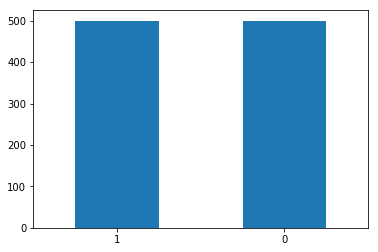

In [51]:
X.Score.value_counts().plot(kind="bar",rot=0)

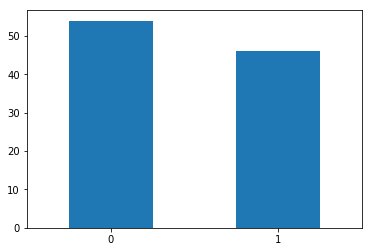

In [62]:
X_sample.Score.value_counts().plot(kind="bar",rot=0)

In [63]:
Y_sample = Y.sample(n=100)

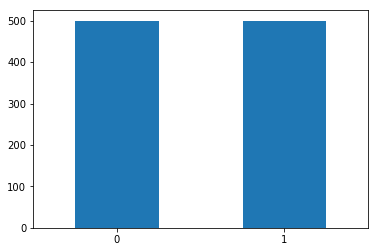

In [64]:
Y.Score.value_counts().plot(kind="bar",rot=0)

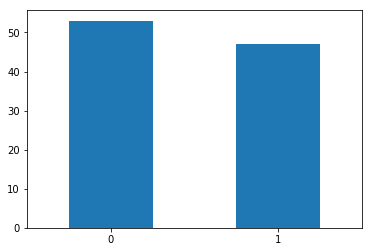

In [65]:
Y_sample.Score.value_counts().plot(kind="bar",rot=0)

In [69]:
Z_sample = Z.sample(n=200)

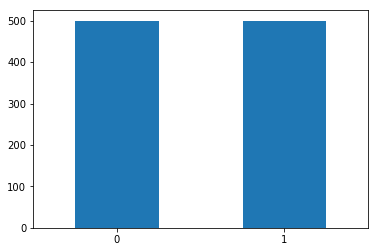

In [70]:
Y.Score.value_counts().plot(kind="bar",rot=0)

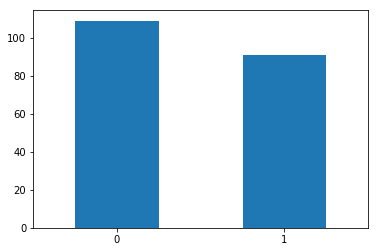

In [71]:
Z_sample.Score.value_counts().plot(kind="bar",rot=0)

## 5.2 Feature Creation

Let's now examine some word distribution by means of feature creation. This is possible by obtaining unigrams for each text. This way we can extract the so-called sentences word by word and dissect them.

In [52]:
from nltk.tokenize import word_tokenize

In [53]:
X['unigrams'] = X['Sentence'].apply(lambda x: dmh.tokenize_text(x)

In [54]:
X[0:4]

,Sentence,Score,unigrams
0,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
1,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
2,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
3,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."


In [55]:
X[0:4]["unigrams"]

0    [Not, sure, who, was, more, lost, -, the, flat...
1    [Attempting, artiness, with, black, &, white, ...
2    [Very, little, music, or, anything, to, speak,...
3    [The, best, scene, in, the, movie, was, when, ...
Name: unigrams, dtype: object

In [56]:
list(X[0:2]['unigrams'])

[['Not',
  'sure',
  'who',
  'was',
  'more',
  'lost',
  '-',
  'the',
  'flat',
  'characters',
  'or',
  'the',
  'audience',
  ',',
  'nearly',
  'half',
  'of',
  'whom',
  'walked',
  'out',
  '.'],
 ['Attempting',
  'artiness',
  'with',
  'black',
  '&',
  'white',
  'and',
  'clever',
  'camera',
  'angles',
  ',',
  'the',
  'movie',
  'disappointed',
  '-',
  'became',
  'even',
  'more',
  'ridiculous',
  '-',
  'as',
  'the',
  'acting',
  'was',
  'poor',
  'and',
  'the',
  'plot',
  'and',
  'lines',
  'almost',
  'non-existent',
  '.']]

Actually, this looks pretty cool. Let's do the same for Y and Z.

In [57]:
Y['unigrams'] = Y['Sentence'].apply(lambda x: dmh.tokenize_text(x))
Z['unigrams'] = Z['Sentence'].apply(lambda x: dmh.tokenize_text(x))

In [58]:
Y

,Sentence,Score,unigrams
0,Crust is not good.,0,"[Crust, is, not, good, .]"
1,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
2,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
3,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."
4,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,..."
5,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did, n't, taste, THAT, fresh, ...."
6,The potatoes were like rubber and you could te...,0,"[The, potatoes, were, like, rubber, and, you, ..."
7,The fries were great too.,1,"[The, fries, were, great, too, .]"
8,A great touch.,1,"[A, great, touch, .]"
9,Service was very prompt.,1,"[Service, was, very, prompt, .]"


In [59]:
Z[0:10]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
4    [I, have, to, jiggle, the, plug, to, get, it, ...
5    [If, you, have, several, dozen, or, several, h...
6    [If, you, are, Razr, owner, ..., you, must, ha...
7      [Needless, to, say, ,, I, wasted, my, money, .]
8         [What, a, waste, of, money, and, time, !, .]
9             [And, the, sound, quality, is, great, .]
Name: unigrams, dtype: object

## 5.3 Feature Subset Selection

Let's make a document-term matrix from the original dataset. 

In [72]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)

In [73]:
analyzer = count_vect.build_analyzer()
analyzer(" ".join(list(X[2:5].Sentence)))

['very',
 'little',
 'music',
 'or',
 'anything',
 'to',
 'speak',
 'of',
 'the',
 'best',
 'scene',
 'in',
 'the',
 'movie',
 'was',
 'when',
 'gerardo',
 'is',
 'trying',
 'to',
 'find',
 'song',
 'that',
 'keeps',
 'running',
 'through',
 'his',
 'head',
 'the',
 'rest',
 'of',
 'the',
 'movie',
 'lacks',
 'art',
 'charm',
 'meaning',
 'if',
 'it',
 'about',
 'emptiness',
 'it',
 'works',
 'guess',
 'because',
 'it',
 'empty']

In [74]:
" ".join(list(X[4:5].Sentence))

"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  "

In [75]:
X_counts.shape

(999, 3044)

In [76]:
count_vect.get_feature_names()[0:10]

['10', '12', '13', '15', '15pm', '17', '18th', '1928', '1947', '1948']

In [77]:
X[0:10]

,Sentence,Score,unigrams
0,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
1,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
2,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
3,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."
4,"The rest of the movie lacks art, charm, meanin...",0,"[The, rest, of, the, movie, lacks, art, ,, cha..."
5,Wasted two hours.,0,"[Wasted, two, hours, .]"
6,Saw the movie today and thought it was a good ...,1,"[Saw, the, movie, today, and, thought, it, was..."
7,A bit predictable.,0,"[A, bit, predictable, .]"
8,Loved the casting of Jimmy Buffet as the scien...,1,"[Loved, the, casting, of, Jimmy, Buffet, as, t..."
9,And those baby owls were adorable.,1,"[And, those, baby, owls, were, adorable, .]"


In [78]:
X_counts[0:10,200:300].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [79]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]

In [80]:
plot_x

['term_10',
 'term_12',
 'term_13',
 'term_15',
 'term_15pm',
 'term_17',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2005',
 'term_2006',
 'term_20th',
 'term_25',
 'term_30',
 'term_40',
 'term_50',
 'term_54',
 'term_70',
 'term_70000',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8pm',
 'term_90',
 'term_95',
 'term_aailiyah',
 'term_abandoned',
 'term_ability',
 'term_about',
 'term_above',
 'term_abroad',
 'term_absolutely',
 'term_abstruse',
 'term_abysmal',
 'term_academy',
 'term_accents',
 'term_accessible',
 'term_acclaimed',
 'term_accolades',
 'term_accurate',
 'term_accurately',
 'term_accused',
 'term_achievement',
 'term_achille',
 'term_ackerman',
 'term_act',
 'term_acted',
 'term_acting',
 'term_action',
 'term_actions',
 'term_actor',
 'term_actors',
 'term_actress',
 'term_actresses',
 'term_actually',
 'term_adams',
 'term_adaptation',
 

In [81]:
plot_y = ["doc_" + str(i) for i in list(X.index)[0:100]]

In [82]:
plot_z = X_counts[0:20, 0:20].toarray()

In [83]:
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

## 5.4 Dimensionality Reduction

We can also reduce dimensionality in case we must avoid the curse of dimensionality. 

In [84]:
from sklearn.decomposition import PCA

In [85]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [86]:
X_reduced.shape

(999, 3)

In [87]:
trace1 = ta.get_trace(X_reduced,X["Score"], "0", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced,X["Score"], "1", "rgb(52,133,252)")

In [88]:
data_trace = [trace1, trace2]

In [89]:
layout = go.Layout(
    margin=dict(
     l=0,
     r=0,
     b=0,
     t=0   
    )
)
fig = go.Figure (data = data_trace, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

## 5.5 Attribute Transformation / Aggregation

More work to deal with sparcity. 

In [90]:
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [91]:
term_frequencies[0]

array([29])

In [322]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies],"Term Frequency Distribution"))

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~orison09/0 or inside your plot.ly account where it is named 'plot from API'


In [92]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [324]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(),term_frequencies_log],"Term Frequency Distribution"))

## 5.6 Discretization and Binarization 

Finally, we can also assign certain categories or binary values for our data. This is useful for certain cases, and basically we assign a binary value to our categories, or types or results. In our case we only have a defined score of either 0 or 1, so in this dataset it doesn't seem too useful.

In [93]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [94]:
mlb = preprocessing.LabelBinarizer()

In [95]:
mlb.fit(X.Score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [96]:
mlb.classes_

array([0, 1])

In [97]:
X['bin_Score'] = mlb.transform(X['Score']).tolist()

In [98]:
X[0:9]

,Sentence,Score,unigrams,bin_Score
0,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat...",[0]
1,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ...",[0]
2,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,...",[0]
3,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ...",[1]
4,"The rest of the movie lacks art, charm, meanin...",0,"[The, rest, of, the, movie, lacks, art, ,, cha...",[0]
5,Wasted two hours.,0,"[Wasted, two, hours, .]",[0]
6,Saw the movie today and thought it was a good ...,1,"[Saw, the, movie, today, and, thought, it, was...",[1]
7,A bit predictable.,0,"[A, bit, predictable, .]",[0]
8,Loved the casting of Jimmy Buffet as the scien...,1,"[Loved, the, casting, of, Jimmy, Buffet, as, t...",[1]


# Conclusions

We are now finished with the assignment. It was definitely a long road down here, filled with many errors and mistakes. But ultimately, the knowledge gained during the journey was very much worth it. This was a great introduction to the world of Data Mining. I leave below some very useful references I found.



## References

Forking in GitHub [Link 1](https://gist.github.com/omarsar/28e426ab2186b27782bbd45352e74731) [Link2](https://help.github.com/articles/syncing-a-fork/#platform-linux)

This Git Guide goes straight to the point [Link](http://rogerdudler.github.io/git-guide/)

I had to download this package manually for nlkt, make a new folder and just place it there. [Link](https://github.com/nltk/nltk_data/blob/gh-pages/packages/tokenizers/punkt.zip)

Aaaaand, some guides for pandas I might have used: 

Read a csv [Link](https://stackoverflow.com/questions/36790948/pandas-read-csv-indicating-space-delimited)
Read a table [Link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)
Add a header [Link](https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe)
Random rows [Link](https://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe)